In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

In [ ]:
X , y = make_regression(n_samples=100 , n_features = 1 , n_informative=1 , n_targets=1,noise = 20 , random_state = 13)

In [ ]:
X[:5]

array([[-0.71239066],
       [-0.43714566],
       [-0.45375238],
       [ 0.95283061],
       [ 0.23785784]])

In [ ]:
y[:5]

array([-34.31988063,  -9.42120961, -19.08818775,  20.43721216,
        27.7559659 ])

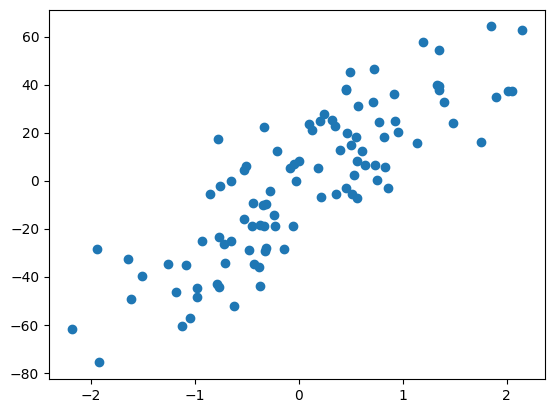

In [ ]:
plt.scatter(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,
                                                       random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.coef_

array([27.66905703])

In [ ]:
reg.intercept_

-2.6537533288365944

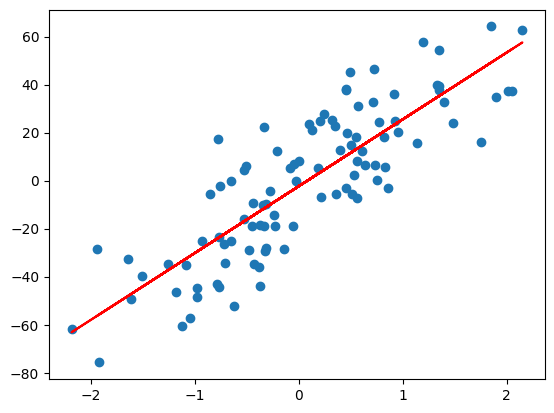

In [ ]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = "red")

In [ ]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6885177188668723

In [ ]:
np.mean(cross_val_score(reg,X,y,scoring="r2",cv=10))

0.6375011587464419

In [ ]:
class GDRegressor():
  def __init__(self,learning_rate , epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X,y):
    ## calcualtea the b using GD
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
      self.b = self.b - (self.lr * loss_slope_b)

      loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b)*X.ravel())
      self.m = self.m - (self.lr * loss_slope_m)



    print(self.b , self.m)

  def predict(self,X):
    return self.m * X + self.b

In [ ]:
gd = GDRegressor(learning_rate=0.001 , epochs = 100)
gd.fit(X_train,y_train)


-2.6537604270100448 27.669071376163558


In [ ]:
y_pred = gd.predict(X_test)
r2_score(y_test,y_pred)

0.6885177146743081